 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Get-data" data-toc-modified-id="Get-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Read-and-preprocess-data" data-toc-modified-id="Read-and-preprocess-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and preprocess data</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Compute-climatology" data-toc-modified-id="Compute-climatology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compute climatology</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Prep-data-for-network" data-toc-modified-id="Prep-data-for-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prep data for network</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Simple-network" data-toc-modified-id="Simple-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple network</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Sliding-input" data-toc-modified-id="Sliding-input-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sliding input</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#No-emb-model" data-toc-modified-id="No-emb-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>No emb model</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Emb-model" data-toc-modified-id="Emb-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Emb model</a></span></li><li><span><a href="http://localhost:8887/notebooks/Untitled.ipynb#Reshape-preds" data-toc-modified-id="Reshape-preds-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reshape preds</a></span></li></ul></div>

# Trial: TRMM predictions for West Africa

1. Get data
2. Read and preprocess data
3. Compute climatology and reference score
4. Prepare data for network
5. Simple reference experiments

In [1]:
# Imports
import netCDF4 as nc
import numpy as np
import h5py
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Plotting setup
%matplotlib inline
np.random.seed(42)
plt.rcParams["figure.figsize"] = (10,7)

## Get data

https://disc.gsfc.nasa.gov/data-access#mac_linux_wget

wget --user "raspstephan"  --password "***" --dns-timeout=5 --connect-timeout=8 -e robots=off -N -r -np -nv -c -nd -A nc4 -P /Volumes/STICK/data/TRMM/ -i TRMM_3B42RT_Daily_V7_links_20171117_195558.txt

## Read and preprocess data

In [3]:
data_dir = '/project/meteo/w2w/A6/S.Rasp/TRMM/'

In [4]:
rg = nc.Dataset(data_dir + '3B42RT_Daily.20010101.7.nc4')

In [5]:
rg

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    BeginDate: 2001-01-01
    BeginTime: 01:30:00.000Z
    EndDate: 2001-01-02
    EndTime: 01:29:59.999Z
    FileHeader: StartGranuleDateTime=2001-01-01T01:30:00.000Z;
StopGranuleDateTime=2001-01-02T01:29:59.999Z
    InputPointer: /ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010103.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010106.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010109.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010112.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010115.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010118.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010121.7R2.nc4;/ftp/data/s4pa/.Zxt5FGhb5T/TRMM_RT/TRMM_3B42RT.7/2001/001/3B42RT.2001010200.7R2.nc4
    title:

In [6]:
lon = rg.variables['lon'][:]
lon

array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875], dtype=float32)

In [7]:
lat = rg.variables['lat'][:]
lat

array([-59.875, -59.625, -59.375, -59.125, -58.875, -58.625, -58.375,
       -58.125, -57.875, -57.625, -57.375, -57.125, -56.875, -56.625,
       -56.375, -56.125, -55.875, -55.625, -55.375, -55.125, -54.875,
       -54.625, -54.375, -54.125, -53.875, -53.625, -53.375, -53.125,
       -52.875, -52.625, -52.375, -52.125, -51.875, -51.625, -51.375,
       -51.125, -50.875, -50.625, -50.375, -50.125, -49.875, -49.625,
       -49.375, -49.125, -48.875, -48.625, -48.375, -48.125, -47.875,
       -47.625, -47.375, -47.125, -46.875, -46.625, -46.375, -46.125,
       -45.875, -45.625, -45.375, -45.125, -44.875, -44.625, -44.375,
       -44.125, -43.875, -43.625, -43.375, -43.125, -42.875, -42.625,
       -42.375, -42.125, -41.875, -41.625, -41.375, -41.125, -40.875,
       -40.625, -40.375, -40.125, -39.875, -39.625, -39.375, -39.125,
       -38.875, -38.625, -38.375, -38.125, -37.875, -37.625, -37.375,
       -37.125, -36.875, -36.625, -36.375, -36.125, -35.875, -35.625,
       -35.375, -35.

In [8]:
rg.close()

In [8]:
# Define lat-lon regions
# For input -60,-10,70,30
# Smaller -30,0,40,25
lon_idxs = (lon > -30) & (lon < 40)
lat_idxs = (lat > 0) & (lat < 25)

In [9]:
cropped_lon = lon[lon_idxs]
cropped_lat = lat[lat_idxs]

In [11]:
# Read all of 2001
def get_trmm_fn(data_dir, yyyy, mm, dd):
    fn = (data_dir + '/3B42RT_Daily.' + str(yyyy) + str(mm).zfill(2) + 
          str(dd).zfill(2) + '.7.nc4')
    return fn

In [12]:
def get_prec_year(yyyy):
    prec_list = []
    td_start = datetime(yyyy, 1, 1)
    td_stop = datetime(yyyy + 1, 1, 1)
    t = td_start
    while t < td_stop:
        # skip leap days
        if t.month == 2 and t.day == 29:
            print('Leap day', t)
            t += timedelta(days=1)
            continue
        fn = get_trmm_fn(data_dir, t.year, t.month, t.day)
        with nc.Dataset(fn) as rg:
            p = rg.variables['precipitation'][lon_idxs, lat_idxs]
        prec_list.append(p)
        t += timedelta(days=1)
    return np.array(prec_list)

In [13]:
def loop_years(yyyy_start, yyyy_stop):
    year_list = []
    for yyyy in range(yyyy_start, yyyy_stop + 1):
        print(yyyy)
        year_list.append(get_prec_year(yyyy))
    return np.array(year_list)

In [81]:
prec = loop_years(2001, 2016)

2001
2002
2003
2004
Leap day 2004-02-29 00:00:00
2005
2006
2007
2008
Leap day 2008-02-29 00:00:00
2009
2010
2011
2012
Leap day 2012-02-29 00:00:00
2013
2014
2015
2016
Leap day 2016-02-29 00:00:00


In [86]:
np.save(data_dir + 'pp_prec.npy', prec)

In [10]:
prec = np.load(data_dir + 'pp_prec.npy')

In [11]:
prec.shape

(16, 365, 280, 100)

In [12]:
thresh = 0.1

In [13]:
bin_prec = np.array(prec > 0.1, dtype=int)

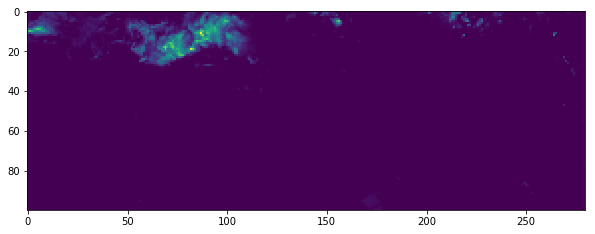

In [14]:
plt.imshow(prec[0, 0].T)

## Compute climatology

In [16]:
def get_clim(bin_prec):
    return np.mean(bin_prec, axis=0)

In [17]:
clim = get_clim(bin_prec[:-1])

In [18]:
def brier_score(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [19]:
brier_score(clim, bin_prec[-1])

0.11988941856925407

## Prep data for network

In [20]:
prec.shape

(16, 365, 280, 100)

In [21]:
bin_prec.shape

(16, 365, 280, 100)

In [22]:
cropped_lon.shape, cropped_lat.shape

((280,), (100,))

In [23]:
# -20,-0,20,20
# Way too large
tar_lon_idxs = (cropped_lon > 5) & (cropped_lon < 6)
tar_lat_idxs = (cropped_lat > 7) & (cropped_lat < 8)
tar_lon = cropped_lon[tar_lon_idxs]
tar_lat = cropped_lat[tar_lat_idxs]
tar_lon, tar_lat

(array([ 5.125,  5.375,  5.625,  5.875], dtype=float32),
 array([ 7.125,  7.375,  7.625,  7.875], dtype=float32))

In [95]:
features = np.reshape(prec, (prec.shape[0] * 365, prec.shape[2], prec.shape[3]))
features.shape

(5840, 280, 100)

In [96]:
# last day of 2010 to 30 dec 2011
features = features[:-1]
features.shape

(5839, 280, 100)

In [97]:
targets = (bin_prec[:, :, tar_lon_idxs, :])[:, :, :, tar_lat_idxs]
targets.shape

(16, 365, 4, 4)

In [98]:
targets = np.reshape(targets, (targets.shape[0] * 365, targets.shape[2], targets.shape[3]))
targets.shape

(5840, 4, 4)

In [99]:
targets = targets[1:]
targets.shape

(5839, 4, 4)

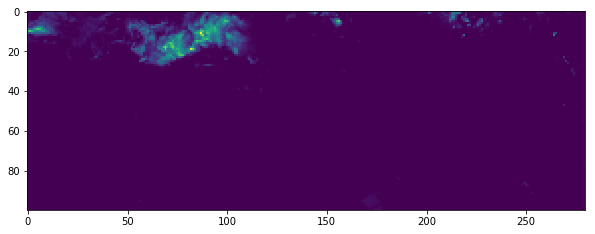

In [100]:
plt.imshow(features[0].T)

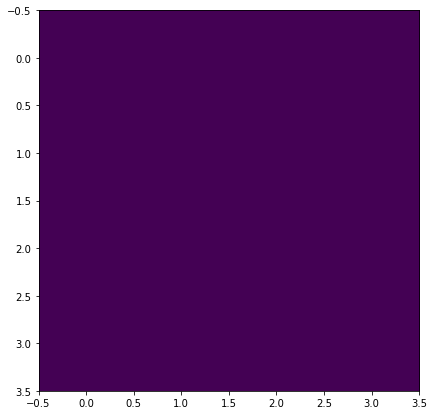

In [101]:
plt.imshow(targets[0].T)

In [102]:
# Clim for target region
tar_clim = (clim[:, tar_lon_idxs, :])[:, :, tar_lat_idxs]
tar_clim.shape

(365, 4, 4)

In [103]:
# BS for target region in 2011
brier_score(tar_clim, targets[-365:])

0.17197666952054794

In [104]:
features.shape, targets.shape

((5839, 280, 100), (5839, 4, 4))

In [105]:
features = np.reshape(features, (features.shape[0], -1))
targets = np.reshape(targets, (targets.shape[0], -1))
features.shape, targets.shape

((5839, 28000), (5839, 16))

In [106]:
train_features = features[:-365]
valid_features = features[-365:]
train_targets = targets[:-365]
valid_targets = targets[-365:]

In [107]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0, ddof=1)
train_std = np.maximum(1e-20, train_std)
train_features = (train_features - train_mean) / train_std
valid_features = (valid_features - train_mean) / train_std

## Simple network

In [24]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [25]:
# Limit Tensorflow GPU memory usage. 
# Note that it's not possible to change the allocation or release memory again.
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True   # Allocates as much memory as needed.
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [26]:
def bs_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [111]:
features.shape, targets.shape

((5839, 28000), (5839, 16))

In [112]:
model = Sequential([
    Dense(targets.shape[1], input_shape=(features.shape[1],),
          activation='sigmoid')
])

In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                448016    
Total params: 448,016
Trainable params: 448,016
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(Adam(1e-4), loss=bs_loss)

In [117]:
model.fit(train_features, train_targets, batch_size=128, epochs=10,
          validation_data=(valid_features, valid_targets))

Train on 5474 samples, validate on 365 samples
Epoch 1/10
5474/5474 [==============================] - 0s - loss: 0.2010 - val_loss: 0.2049
Epoch 2/10
5474/5474 [==============================] - 0s - loss: 0.1766 - val_loss: 0.2019
Epoch 3/10
5474/5474 [==============================] - 0s - loss: 0.1613 - val_loss: 0.2060
Epoch 4/10
5474/5474 [==============================] - 0s - loss: 0.1490 - val_loss: 0.2052
Epoch 5/10
5474/5474 [==============================] - 0s - loss: 0.1383 - val_loss: 0.2078
Epoch 6/10
5474/5474 [==============================] - 0s - loss: 0.1292 - val_loss: 0.2072
Epoch 7/10
5474/5474 [==============================] - 0s - loss: 0.1215 - val_loss: 0.2096
Epoch 8/10
5474/5474 [==============================] - 0s - loss: 0.1147 - val_loss: 0.2090
Epoch 9/10
5474/5474 [==============================] - 0s - loss: 0.1086 - val_loss: 0.2089
Epoch 10/10
5474/5474 [==============================] - 0s - loss: 0.1028 - val_loss: 0.2115


In [118]:
preds = model.predict(valid_features)

In [119]:
preds.shape

(365, 16)

In [120]:
preds[0]

array([ 0.26330206,  0.21054636,  0.16216485,  0.13229996,  0.18562073,
        0.13918187,  0.10213022,  0.12913097,  0.1416048 ,  0.15656459,
        0.1380605 ,  0.13698256,  0.12104499,  0.09661961,  0.09592402,
        0.13062617], dtype=float32)

## Sliding input

In [27]:
prec.shape

(16, 365, 280, 100)

In [28]:
cropped_lon.min(), cropped_lon.max(), cropped_lat.min(), cropped_lat.max()

(-29.875, 39.875, 0.125, 24.875)

In [29]:
# Sliding indices
# -20,-0,20,20 -30,0,40,25
# -5, 5, 5, 15
tar_lon_idxs = (cropped_lon > -5) & (cropped_lon < 5)
tar_lat_idxs = (cropped_lat > 5) & (cropped_lat < 15)
tar_lon = cropped_lon[tar_lon_idxs]
tar_lat = cropped_lat[tar_lat_idxs]
tar_lon, tar_lat

(array([-4.875, -4.625, -4.375, -4.125, -3.875, -3.625, -3.375, -3.125,
        -2.875, -2.625, -2.375, -2.125, -1.875, -1.625, -1.375, -1.125,
        -0.875, -0.625, -0.375, -0.125,  0.125,  0.375,  0.625,  0.875,
         1.125,  1.375,  1.625,  1.875,  2.125,  2.375,  2.625,  2.875,
         3.125,  3.375,  3.625,  3.875,  4.125,  4.375,  4.625,  4.875], dtype=float32),
 array([  5.125,   5.375,   5.625,   5.875,   6.125,   6.375,   6.625,
          6.875,   7.125,   7.375,   7.625,   7.875,   8.125,   8.375,
          8.625,   8.875,   9.125,   9.375,   9.625,   9.875,  10.125,
         10.375,  10.625,  10.875,  11.125,  11.375,  11.625,  11.875,
         12.125,  12.375,  12.625,  12.875,  13.125,  13.375,  13.625,
         13.875,  14.125,  14.375,  14.625,  14.875], dtype=float32))

In [30]:
# Clim for target region
tar_clim = (clim[:, tar_lon_idxs, :])[:, :, tar_lat_idxs]
tar_clim.shape

(365, 40, 40)

In [31]:
ws = 5

In [32]:
window_lon_idxs = np.where(tar_lon_idxs)[0]
window_lat_idxs = np.where(tar_lat_idxs)[0]

In [33]:
window_lon_idxs, window_lat_idxs

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59]))

In [34]:
prec_flat = np.reshape(prec, (prec.shape[0] * 365, prec.shape[2], prec.shape[3]))
bin_prec_flat = np.reshape(bin_prec, (bin_prec.shape[0] * 365, bin_prec.shape[2], bin_prec.shape[3]))

In [35]:
prec_flat.shape, bin_prec_flat.shape

((5840, 280, 100), (5840, 280, 100))

In [37]:
features_list = []
targets_list = []
emb_list = []
i_emb = 0
for i in list(window_lon_idxs):
    for j in list(window_lat_idxs):
        features_list.append(prec_flat[:-1, i-ws:i+ws, j-ws:j+ws])
        targets_list.append(bin_prec_flat[1:, i, j])
        e = np.ones(bin_prec_flat.shape[0] - 1) * i_emb
        emb_list.append(e)
        i_emb += 1
features = np.array(features_list)
targets = np.array(targets_list)
embs = np.array(emb_list)

In [38]:
features.shape, targets.shape, embs.shape

((1600, 5839, 10, 10), (1600, 5839), (1600, 5839))

In [39]:
features = features.reshape((1600, features.shape[1], (ws*2)**2))

In [41]:
train_features = features[:, :-365]
valid_features = features[:, -365:]
train_targets = targets[:, :-365]
valid_targets = targets[:, -365:]
train_embs = embs[:, :-365]
valid_embs = embs[:, -365:]

In [42]:
train_features = train_features.reshape((-1, (ws*2)**2))
valid_features = valid_features.reshape((-1, (ws*2)**2))
train_targets = np.ravel(train_targets)
valid_targets = np.ravel(valid_targets)
train_embs = np.ravel(train_embs)
valid_embs = np.ravel(valid_embs)

In [43]:
train_features.shape, valid_features.shape, train_targets.shape, valid_targets.shape

((8758400, 100), (584000, 100), (8758400,), (584000,))

In [44]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0, ddof=1)
train_std = np.maximum(1e-20, train_std)
train_features = (train_features - train_mean) / train_std
valid_features = (valid_features - train_mean) / train_std

## No emb model

In [45]:
model = Sequential([
    Dense(200, input_shape=(train_features.shape[1],),
          activation='relu'),
    Dense(1, activation='sigmoid')
])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(Adam(1e-4), loss=bs_loss)

In [48]:
model.fit(train_features, train_targets, batch_size=1024, epochs=3,
          validation_data=(valid_features, valid_targets))

Train on 8758400 samples, validate on 584000 samples
Epoch 1/3
8758400/8758400 [==============================] - 28s - loss: 0.1709 - val_loss: 0.1696
Epoch 2/3
8758400/8758400 [==============================] - 27s - loss: 0.1687 - val_loss: 0.1688
Epoch 3/3
8758400/8758400 [==============================] - 28s - loss: 0.1679 - val_loss: 0.1682


In [49]:
clim.shape, bin_prec.shape

((365, 280, 100), (16, 365, 280, 100))

In [52]:
tar_bin_prec = ((bin_prec[-1])[:, tar_lon_idxs, :])[:, :, tar_lat_idxs]

In [53]:
brier_score(tar_clim, tar_bin_prec)

0.1597361643835617

## Emb model

In [54]:
from keras.models import Model
from keras.layers import Input, Dense, merge, Embedding, Flatten, Concatenate

In [55]:
max_id = int(train_embs.max())
emb_size = 3
max_id

1599

In [63]:
features_in = Input(shape=(train_features.shape[1],))
id_in = Input(shape=(1,))
emb = Embedding(max_id + 1, emb_size)(id_in)
emb = Flatten()(emb)
x = Concatenate()([features_in, emb])
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[features_in, id_in], outputs=x)

In [64]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_7 (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_4 (Embedding)          (None, 1, 3)          4800        input_7[0][0]                    
____________________________________________________________________________________________________
input_6 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 3)             0           embedding_4[0][0]                
___________________________________________________________________________________________

In [65]:
model.compile(Adam(1e-3), loss=bs_loss)

In [67]:
model.optimizer.lr = 1e-4

In [68]:
model.fit([train_features, train_embs], train_targets, batch_size=1024, epochs=3,
          validation_data=([valid_features, valid_embs], valid_targets))

Train on 8758400 samples, validate on 584000 samples
Epoch 1/3
8758400/8758400 [==============================] - 41s - loss: 0.1598 - val_loss: 0.1606
Epoch 2/3
8758400/8758400 [==============================] - 40s - loss: 0.1595 - val_loss: 0.1603
Epoch 3/3
8758400/8758400 [==============================] - 40s - loss: 0.1592 - val_loss: 0.1601


## Reshape preds

In [69]:
# Regrid predictions
preds = model.predict([valid_features, valid_embs])
preds.shape

(584000, 1)

In [70]:
# 1600, 365
tmp = preds.reshape((1600, 365))

In [71]:
tmp = tmp.reshape((40, 40, 365))

In [72]:
tmp = np.rollaxis(tmp, 2, 0)
tmp.shape

(365, 40, 40)

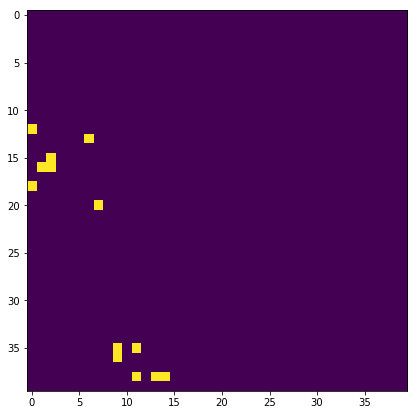

In [73]:
plt.imshow(tar_bin_prec[0])

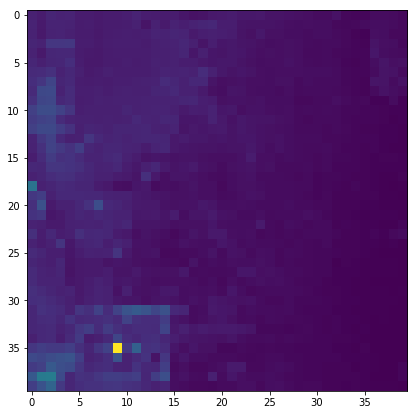

In [74]:
plt.imshow(tmp[0])

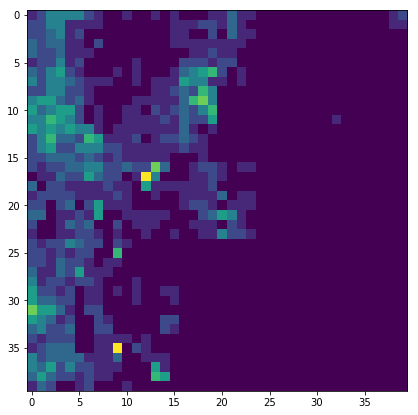

In [75]:
plt.imshow(tar_clim[0])

In [76]:
brier_score(tar_bin_prec, tmp)

0.1600738937137674

In [208]:
model2 = Sequential([
    Dense(100, input_shape=(train_features.shape[1],),
          activation='relu'),
    Dense(1, activation='sigmoid')
])

In [209]:
model2.compile(Adam(1e-4), loss=bs_loss)

In [210]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 10,201
Trainable params: 10,201
Non-trainable params: 0
_________________________________________________________________


In [211]:
model2.fit(train_features, train_targets, batch_size=1024, epochs=3,
          validation_data=(valid_features, valid_targets))

Train on 8758400 samples, validate on 584000 samples
Epoch 1/3
8758400/8758400 [==============================] - 27s - loss: 0.1724 - val_loss: 0.1705
Epoch 2/3
8758400/8758400 [==============================] - 27s - loss: 0.1695 - val_loss: 0.1694
Epoch 3/3
5155840/8758400 [================>.............] - ETA: 10s - loss: 0.1686

KeyboardInterrupt: 